In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("train_qa.csv").reset_index(drop=True)

In [4]:
m_sent = 0
m_len_ans = 0
m_words = 0
for i in range(len(data)):
    len_sent = len(data.iloc[i]['paragraph'].split('.'))
    '''if len_sent == 77:
        print(data.iloc[i])'''
    m_sent = max(len_sent, m_sent)
    m_words = max(m_words, len(data.iloc[i]['paragraph'].split()))
    len_ans = len(data.iloc[i]['answer'].split())
    '''if len_ans == 29:
        print(data.iloc[i])'''
    m_len_ans = max(m_len_ans, len_ans)

In [5]:
data.loc[26602]['paragraph']

'Во Франции пластика продолжала держаться парадного придворного направления эпохи Людовика XIV, все более и более вдаваясь в жеманство. Лучший скульптор этого времени Жан-Батист Лемуан (1704—1778; многочисленные бюсты и статуи современных знаменитостей). Его ученик Фальконе (1716—1791), даровитый автор петербургского памятника Петру Великому. В духе античного искусства старались трудиться Бушардон (1698—1762) и Пигаль (1714—1785; статуя маршала Морица Саксонского в Страсбурге). Французская школа прежде других сбросила с себя иго абсолютного классицизма и смело пошла по дороге реализма. Гудон (1741—1828) внес во французское ваяние большую простоту и жизненность; его знаменитая статуя Вольтера в Comedie Francaise (другой экземпляр — в Имп. Эрмитаже) с поразительной верностью передает наружность и саркастический характер фернейского философа. Ещё скульпторы Первой империи, Картелье, вышеупомянутый Шоде, Ф. Бозио (барельефы Вандомск. колонны, конная статуя Людовика XIV на площади Побед в П

In [6]:
m_sent

77

In [7]:
print(data.iloc[34157])

paragraph_id                                                 1310
question_id                                                 61603
paragraph       Четвёртый альбом Issues (1999) группы Korn так...
question        Сколько в первую неделю было продано копий аль...
answer          Четвёртый альбом Issues (1999) группы Korn так...
Name: 34157, dtype: object


In [8]:
data = data.drop([34157])

In [9]:
m_words

1041

In [19]:
distr = list(map(lambda x: len(x.split()), data['paragraph'].values))


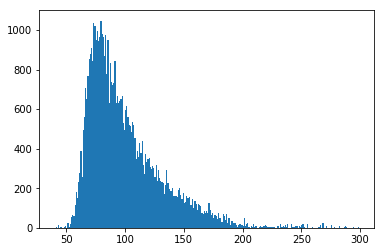

In [30]:
import matplotlib.pyplot as plt

plt.hist(distr, bins=range(40, 300))
plt.show()

In [24]:
distr2 = list(map(lambda x: len(x.split()), data['answer'].values))


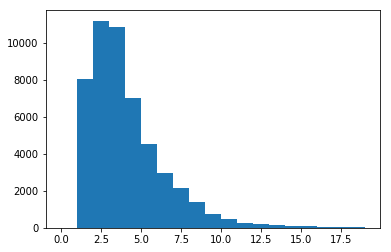

In [14]:
plt.hist(distr2,bins=range(0, 20))
plt.show()

In [85]:
data['paragraph'][0]

'Первые упоминания о строении человеческого тела встречаются в Древнем Египте. В XXVII веке до н. э. египетский врач Имхотеп описал некоторые органы и их функции, в частности головной мозг, деятельность сердца, распространение крови по сосудам. В древнекитайской книге Нейцзин (XI—VII вв. до н. э.) упоминаются сердце, печень, лёгкие и другие органы тела человека. В индийской книге Аюрведа ( Знание жизни , IX-III вв. до н. э.) содержится большой объём анатомических данных о мышцах, нервах, типах телосложения и темперамента, головном и спинном мозге.'

In [ ]:
def gen_possible(text, answer):
    

In [87]:
def prepare_sample(text, question, answer):
    answer = answer.lower()
    while (answer[0] == '.'):
        answer = answer[1:]
    while (answer[-1] in ['.', '?']):
        answer = answer[:-1]
        
    if answer not in text.lower():
        return [], []
    
    first = text.lower().find(answer)
    last = first + len(answer)
    
    text_1 = text[:first].strip()
    text_2 = text[first:last].strip()
    text_3 = text[last:].strip()
    text_tokens = tokenizer.tokenize(text_1)
    first = len(text_tokens)
    text_tokens += tokenizer.tokenize(text_2)
    last = len(text_tokens) - 1
    text_tokens += tokenizer.tokenize(text_3)
    
    question_tokens = tokenizer.tokenize(question)
    
    length = MAX_TEXT_LEN - len(question_tokens) - 3
    if len(text_tokens) > length:
        part_length = length // 3
        stride = 3 * part_length
        nrow = np.ceil(len(text_tokens) / part_length) - 2
        indexes = part_length * np.arange(nrow)[:, None] + np.arange(stride)
        indexes = indexes.astype(np.int32)

        max_index = indexes.max()
        diff = max_index + 1 - len(text_tokens)
        text_tokens += diff * [tokenizer.pad_token]

        text_tokens = np.array(text_tokens)[indexes].tolist()
        
        tokens = []
        labels = []
        for i, ts in enumerate(text_tokens):
            while ts[-1] == tokenizer.pad_token:
                ts = ts[:-1]
                
            tokens += [ts]
                
            lfirst = first - i * part_length
            llast = last - i * part_length
            
            mask = lfirst >= 0 and lfirst < len(ts) and llast >= 0 and llast < len(ts)
            labels += [((lfirst if mask else 0, mask), (llast if mask else 0, mask))]
    else:
        tokens = [text_tokens]
        labels = [((first, 1), (last, 1))]
        
    for i in range(len(tokens)):
        tokens[i] = [tokenizer.cls_token] + \
                    question_tokens + \
                    [tokenizer.sep_token] + \
                    tokens[i] + \
                    [tokenizer.sep_token]
        labels[i] = ((labels[i][0][0] + 2 + len(question_tokens), labels[i][0][1]),
                     (labels[i][1][0] + 2 + len(question_tokens), labels[i][1][1]))

    return tokens, labels

In [88]:
import numpy as np

In [89]:
print(prepare_sample(data['paragraph'][0], data['question'][0], data['answer'][0]))

NameError: name 'tokenizer' is not defined

In [33]:
from pymystem3 import Mystem

m = Mystem()
#    texts = list(map(lambda line: m.lemmatize(line.strip()), f.readlines()))

print(m.analyze("Ай да А.С. Пушкин! Ай да сукин сын! Что же ты делаешь! Не иди в лес"))

[{'analysis': [{'lex': 'ай', 'wt': 0.9841479957, 'gr': 'INTJ='}], 'text': 'Ай'}, {'text': ' '}, {'analysis': [{'lex': 'да', 'wt': 0.3749187405, 'gr': 'PART='}], 'text': 'да'}, {'text': ' '}, {'analysis': [{'lex': 'а', 'wt': 0.9822148501, 'gr': 'CONJ='}], 'text': 'А'}, {'text': '.'}, {'analysis': [{'lex': 'с', 'wt': 2.2169018090000002e-05, 'gr': 'S,сокр=(пр,мн|пр,ед|вин,мн|вин,ед|дат,мн|дат,ед|род,мн|род,ед|твор,мн|твор,ед|им,мн|им,ед)'}], 'text': 'С'}, {'text': '. '}, {'analysis': [{'lex': 'пушкин', 'wt': 0.9968761998000001, 'gr': 'S,фам,муж,од=им,ед'}], 'text': 'Пушкин'}, {'text': '! '}, {'analysis': [{'lex': 'ай', 'wt': 0.9841479957, 'gr': 'INTJ='}], 'text': 'Ай'}, {'text': ' '}, {'analysis': [{'lex': 'да', 'wt': 0.6249755963, 'gr': 'CONJ='}], 'text': 'да'}, {'text': ' '}, {'analysis': [{'lex': 'сукин', 'wt': 1, 'gr': 'A,полн,притяж=(вин,ед,муж,неод|им,ед,муж)'}], 'text': 'сукин'}, {'text': ' '}, {'analysis': [{'lex': 'сын', 'wt': 1, 'gr': 'S,муж,од=им,ед'}], 'text': 'сын'}, {'text':

In [36]:
S = 0
V = 0
A = 0
PR = 0
ADV = 0
CONJ = 0
dic = {'S': (def f(): )}

SyntaxError: invalid syntax (<ipython-input-36-13d0ba584ea2>, line 7)

In [43]:
def get_stat_mystem(phrase):
    analyzed = m.analyze(phrase)
    stats = {'S': 0, 'V': 0, 'A':0, 'PR':0, 'ADV': 0, 'CONJ': 0}
    for t in analyzed:
        if 'analysis' in t:
            if 'gr' in t['analysis'][0]:
                gr = t['analysis'][0]['gr'].split('=')[0].split(',')[0]
                if gr in stats:
                    stats[gr] += 1
    print(stats.values())
    return list(map(lambda x: x / len(analyzed), list(stats.values())))

In [45]:
meow = get_stat_mystem("Ай да А.С. Пушкин! Ай да сукин сын! Что же ты делаешь! Не иди в лес")

dict_values([4, 2, 1, 1, 0, 2])


In [46]:
l = [1, 2, 3, *meow]

In [47]:
l

[1,
 2,
 3,
 0.11764705882352941,
 0.058823529411764705,
 0.029411764705882353,
 0.029411764705882353,
 0.0,
 0.058823529411764705]

In [50]:
l = []
l = l + [1, 2, 3]

In [51]:
l

[1, 2, 3]

In [52]:
l + [3, 4, 5]

[1, 2, 3, 3, 4, 5]

In [53]:
l

[1, 2, 3]

In [6]:
aba = [['meow', 'chika', 'ha'], [1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [7]:
import numpy as np

daba = np.array(aba)

In [8]:
import pandas as pd

In [12]:
daba

array([['meow', 'chika', 'ha'],
       ['1', '2', '3'],
       ['4', '5', '6'],
       ['7', '8', '9']], dtype='<U5')

In [13]:
df = pd.DataFrame(daba[1:], columns=daba[0])

In [14]:
df

,meow,chika,ha
0,1,2,3
1,4,5,6
2,7,8,9


In [19]:
result = [4, 5, 6]
array = np.zeros((daba.shape[0] - 1, daba.shape[1] + 1))
array[:, :-1] = daba[1:]
array[:, -1] = np.array(result)
print(array)
df = pd.DataFrame(array, columns=(list(daba[0])+["result"]))

[[1. 2. 3. 4.]
 [4. 5. 6. 5.]
 [7. 8. 9. 6.]]


In [20]:
df

,meow,chika,ha,result
0,1.0,2.0,3.0,4.0
1,4.0,5.0,6.0,5.0
2,7.0,8.0,9.0,6.0


In [22]:
df.to_csv("check_saved.csv", sep=',')

In [23]:
meow = [14754, 60544, 0.7150191036551836, 3, 4, 4, 0.5126934313008429, 0.7250580038852508, 0.0, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.25, 0.125, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.125, 0.0, 0.0]
len(meow)

27

In [24]:
label = ['paragraph_id', 'question_id', 'sent_prob',
         'len_l', 'len_a', 'len_r',
         'cos_l', 'cos_a', 'cos_r',
         'l_S', 'l_V', 'l_A', 'l_PR', 'l_ADV', 'l_CONJ',
         'm_S', 'm_V', 'm_A', 'm_PR', 'm_ADV', 'm_CONJ',
         'r_S', 'r_V', 'r_A', 'r_PR', 'r_ADV', 'r_CONJ',
         'result',
         ]

In [25]:
len(label)

28

In [26]:
len(set(label))

28

In [27]:
question_features = pd.DataFrame(columns=['question_id', 'q_S', 'q_V', 'q_A', 'q_PR', 'q_ADV', 'q_CONJ',])

In [28]:
question_features

,question_id,q_S,q_V,q_A,q_PR,q_ADV,q_CONJ


In [ ]:
df = pd.merge(df2, df1, on=['document_id','item_id'])